In [1]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
import matplotlib.pyplot as plt

In [9]:
pip install ffmpeg

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(
    dim=image_size, n_train=6000, n_test=1000)

In [3]:
dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=15
                    )

In [4]:
dbn.train_greedylayerwise(
    vis_trainset=train_imgs,
    lbl_trainset=train_lbls, 
    iterations_number=10
)

loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


In [5]:
dbn.rbm_stack

{'vis--hid': <rbm.RestrictedBoltzmannMachine at 0x7f5abc456850>,
 'hid--pen': <rbm.RestrictedBoltzmannMachine at 0x7f5afc737820>,
 'pen+lbl--top': <rbm.RestrictedBoltzmannMachine at 0x7f5afc737e20>}

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

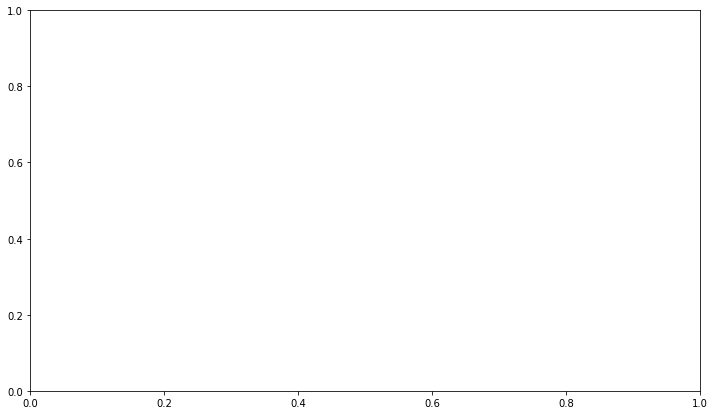

In [6]:
plt.figure(figsize=(12, 7))

# Plot the functions to be approximated

plt.plot([0, 2, 4, 6, 10], dbn.rbm_stack['vis--hid'].losses, label='vis--hid')
plt.plot([0, 2, 4, 6, 10], dbn.rbm_stack['hid--pen'].losses, label='hid--pen')
plt.plot([0, 2, 4, 6, 10], dbn.rbm_stack['pen+lbl--top'].losses, label='pen+lbl--top')

plt.xlabel('Iteration_number')
plt.ylabel('MSE')
plt.grid()
plt.legend()

plt.savefig('images/reconstruction_losses_stack')

plt.show()

In [6]:
dbn.recognize(train_imgs, train_lbls)

dbn.recognize(test_imgs, test_lbls)

accuracy = 10.57%
accuracy = 10.70%


Generating number 0


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

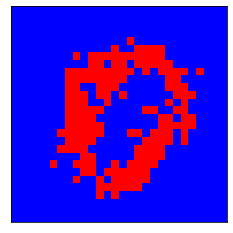

In [7]:
all_last = []
for digit in range(10):
    print("Generating number",digit)
    digit_1hot = np.zeros(shape=(1, 10))
    digit_1hot[0, digit] = 1
    all_last.append(dbn.generate(digit_1hot, name="rbms"))

plt.close('all')
# all_last=[np.random.randint(0,2,(5,5)) for i in range(10)]
for i, img in enumerate(all_last):
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='Greys', interpolation=None)
    plt.xticks([]);
    plt.yticks([]);
    plt.xlabel(i)
plt.savefig('images/gen_4_2_samples6000iter800.pdf')